In [1]:
from keras import Sequential
from keras.layers import Conv2D, Dropout, Activation, MaxPool2D, Flatten, Dense
from sklearn import datasets
from sklearn import model_selection
from keras.utils import to_categorical
import numpy as np

/home/rafael/anaconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Datos

In [2]:
data = datasets.load_digits()

X = data.images

Y = data.target

m = X.shape[0]

Y_encoded = to_categorical(Y)

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y_encoded, test_size=0.20, random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1437, 8, 8)
(1437, 10)
(360, 8, 8)
(360, 10)


# CNN

In [3]:
model = Sequential()

In [4]:
model.add(Conv2D(9, (3,3), padding='same', input_shape=(8,8,1)))
model.add(Activation('relu'))
model.add(Conv2D(15, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(1,1), strides=1))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
X_train_d = np.array([X_train.copy()])
xtrshape = X_train_d.shape
X_test_d = np.array([X_test.copy()])
xteshape = X_test_d.shape

#print(X_train_d.shape)
#print(X_train_d.reshape(xtrshape[1],xtrshape[2],xtrshape[3], xtrshape[0]).shape)
model.fit(X_train_d.reshape((xtrshape[1],xtrshape[2],xtrshape[3], xtrshape[0])), Y_train, epochs=100, batch_size=90)

Epoch 1/100
1437/1437 [==============================] - 0s 293us/step - loss: 1.9914 - acc: 0.3563
Epoch 2/100
1437/1437 [==============================] - 0s 118us/step - loss: 0.9076 - acc: 0.7411
Epoch 3/100
1437/1437 [==============================] - 0s 102us/step - loss: 0.4565 - acc: 0.8643
Epoch 4/100
1437/1437 [==============================] - 0s 108us/step - loss: 0.2985 - acc: 0.9123
Epoch 5/100
1437/1437 [==============================] - 0s 123us/step - loss: 0.2400 - acc: 0.9332
Epoch 6/100
1437/1437 [==============================] - 0s 139us/step - loss: 0.1838 - acc: 0.9443
Epoch 7/100
1437/1437 [==============================] - 0s 103us/step - loss: 0.1692 - acc: 0.9485
Epoch 8/100
1260/1437 [=========================>....] - ETA: 0s - loss: 0.1613 - acc: 0.9484

KeyboardInterrupt: 

In [10]:
#model_yaml = model.to_yaml()
#with open('ModeloDigitosCNN.yaml', 'w') as yaml_file:
#    yaml_file.write(model_yaml)
#model.save_weights('ModeloDigitosCNN.h5')

## Modelo guardado

In [2]:
from keras.models import model_from_yaml

yaml_file = open('ModeloDigitosCNN.yaml', 'r')
mdl_yaml = yaml_file.read()
yaml_file.close()

mdl = model_from_yaml(mdl_yaml)
mdl.load_weights('ModeloDigitosCNN.h5')

mdl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
scores = mdl.evaluate(X_test_d.reshape((xteshape[1],xteshape[2],xteshape[3], xteshape[0])), Y_test)
print('\n' + model.metrics_names[1], scores[1]*100, '%')

360/360 [==============================] - 0s 301us/step

acc 99.44444444444444 %


In [13]:
from sklearn import metrics

Y_decoded = np.argmax(Y_test, axis=1)
pred_decoded = np.argmax(mdl.predict(X_test.reshape((xteshape[1],xteshape[2],xteshape[3], xteshape[0]))), axis=1)

print(metrics.classification_report(Y_decoded, pred_decoded))
print('Confussion Matrix')
print(metrics.confusion_matrix(Y_decoded, pred_decoded))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        43
          1       1.00      1.00      1.00        35
          2       1.00      1.00      1.00        36
          3       0.98      1.00      0.99        41
          4       1.00      1.00      1.00        38
          5       1.00      0.93      0.97        30
          6       1.00      1.00      1.00        37
          7       1.00      1.00      1.00        37
          8       1.00      1.00      1.00        29
          9       0.97      1.00      0.99        34

avg / total       0.99      0.99      0.99       360

Confussion Matrix
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  1  0 28  0  0  0  1]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  0  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0  0  0 34]]


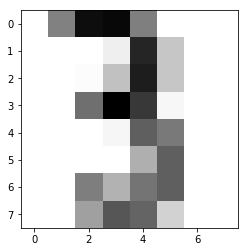

(1, 8, 8, 1)
3


In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

test_digit = cv2.imread('test_digit_31.png')[:,:,0]
test_digit = cv2.resize(test_digit, (8,8), interpolation=cv2.INTER_AREA)


plt.imshow(test_digit, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
test_digit_d = np.array([np.array([test_digit]).reshape((8,8,1))]).reshape((1,8,8,1))

print(test_digit_d.shape)
pred = np.argmax(mdl.predict(test_digit_d))
print(pred)